In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score

### SVM (sklearn)
#### Linearly separable, two features

In [19]:
# Dataset
data = pd.DataFrame({
    'x_1': [ 1, 0, 2, 2,   3,  3,  4],
    'x_2': [ 0, 4, 5, 2.5, 2,  0,  2],
    'y':   [-1, 1, 1, 1,  -1, -1, -1]
})
print(data)
X = data.loc[:,'x_1':'x_2'].values
y = data['y']

   x_1  x_2  y
0    1  0.0 -1
1    0  4.0  1
2    2  5.0  1
3    2  2.5  1
4    3  2.0 -1
5    3  0.0 -1
6    4  2.0 -1


In [20]:
# Train linear SVM
clf = SVC(C=2, kernel='linear')
clf.fit(X, y)

SVC(C=2, kernel='linear')

In [21]:
# Determine the decision boundary
w = clf.coef_[0]
a = -w[0] / w[1]
x_ = np.linspace(min(X[:, 1]) - 0.50 * np.std(X[:, 1]), 
                 max(X[:, 1]) + 0.50 * np.std(X[:, 1]))
b = clf.intercept_[0]
y_ = a * x_ - b / w[1]
y_minus_one = a * x_ + (-b - 1) / w[1]
y_plus_one  = a * x_ + (-b + 1) / w[1]

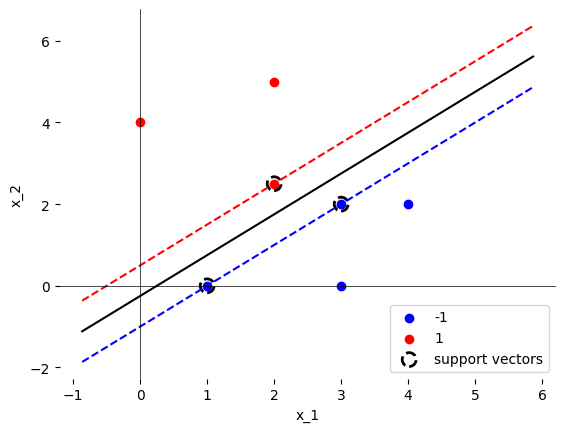

   x_1  x_2  y  y_hat
0    1  0.0 -1     -1
1    0  4.0  1      1
2    2  5.0  1      1
3    2  2.5  1      1
4    3  2.0 -1     -1
clf((2, 0)) = -1


In [22]:
# Plot
fig = plt.figure()
plt.plot(x_, y_, 'k-')
plt.plot(x_, y_minus_one, 'b--')
plt.plot(x_, y_plus_one,  'r--')

plt.scatter(X[y == -1, 0], X[y == -1, 1], c = 'b', label = -1)
plt.scatter(X[y ==  1, 0], X[y ==  1, 1], c = 'r', label =  1)
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.axhline(y = 0, color = 'k', linewidth = 0.5)
plt.axvline(x = 0, color = 'k', linewidth = 0.5)


# Plot support vectors
support_vectors = clf.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s = 100, 
            facecolor = 'None', edgecolor = 'k', linestyle = 'dashed', linewidth = 2, label = 'support vectors')

plt.legend()
plt.box(False)
plt.show()

# Prediction on X (check)
data['y_hat'] = clf.predict(X)
print(data.head())

# Test on new x
print(f'clf((2, 0)) = {clf.predict([[2, 0]])[0]}')

### SVM (sklearn)
#### Non linear, dimension reduction, map to <span style="color:red">two</span> principal components (linear combination off all features)

In [27]:
# Dataset
data = pd.read_csv('recipes_muffins_cupcakes.csv')
X = data.loc[:,'Flour':'Salt'].values
y = data['Type']
data

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


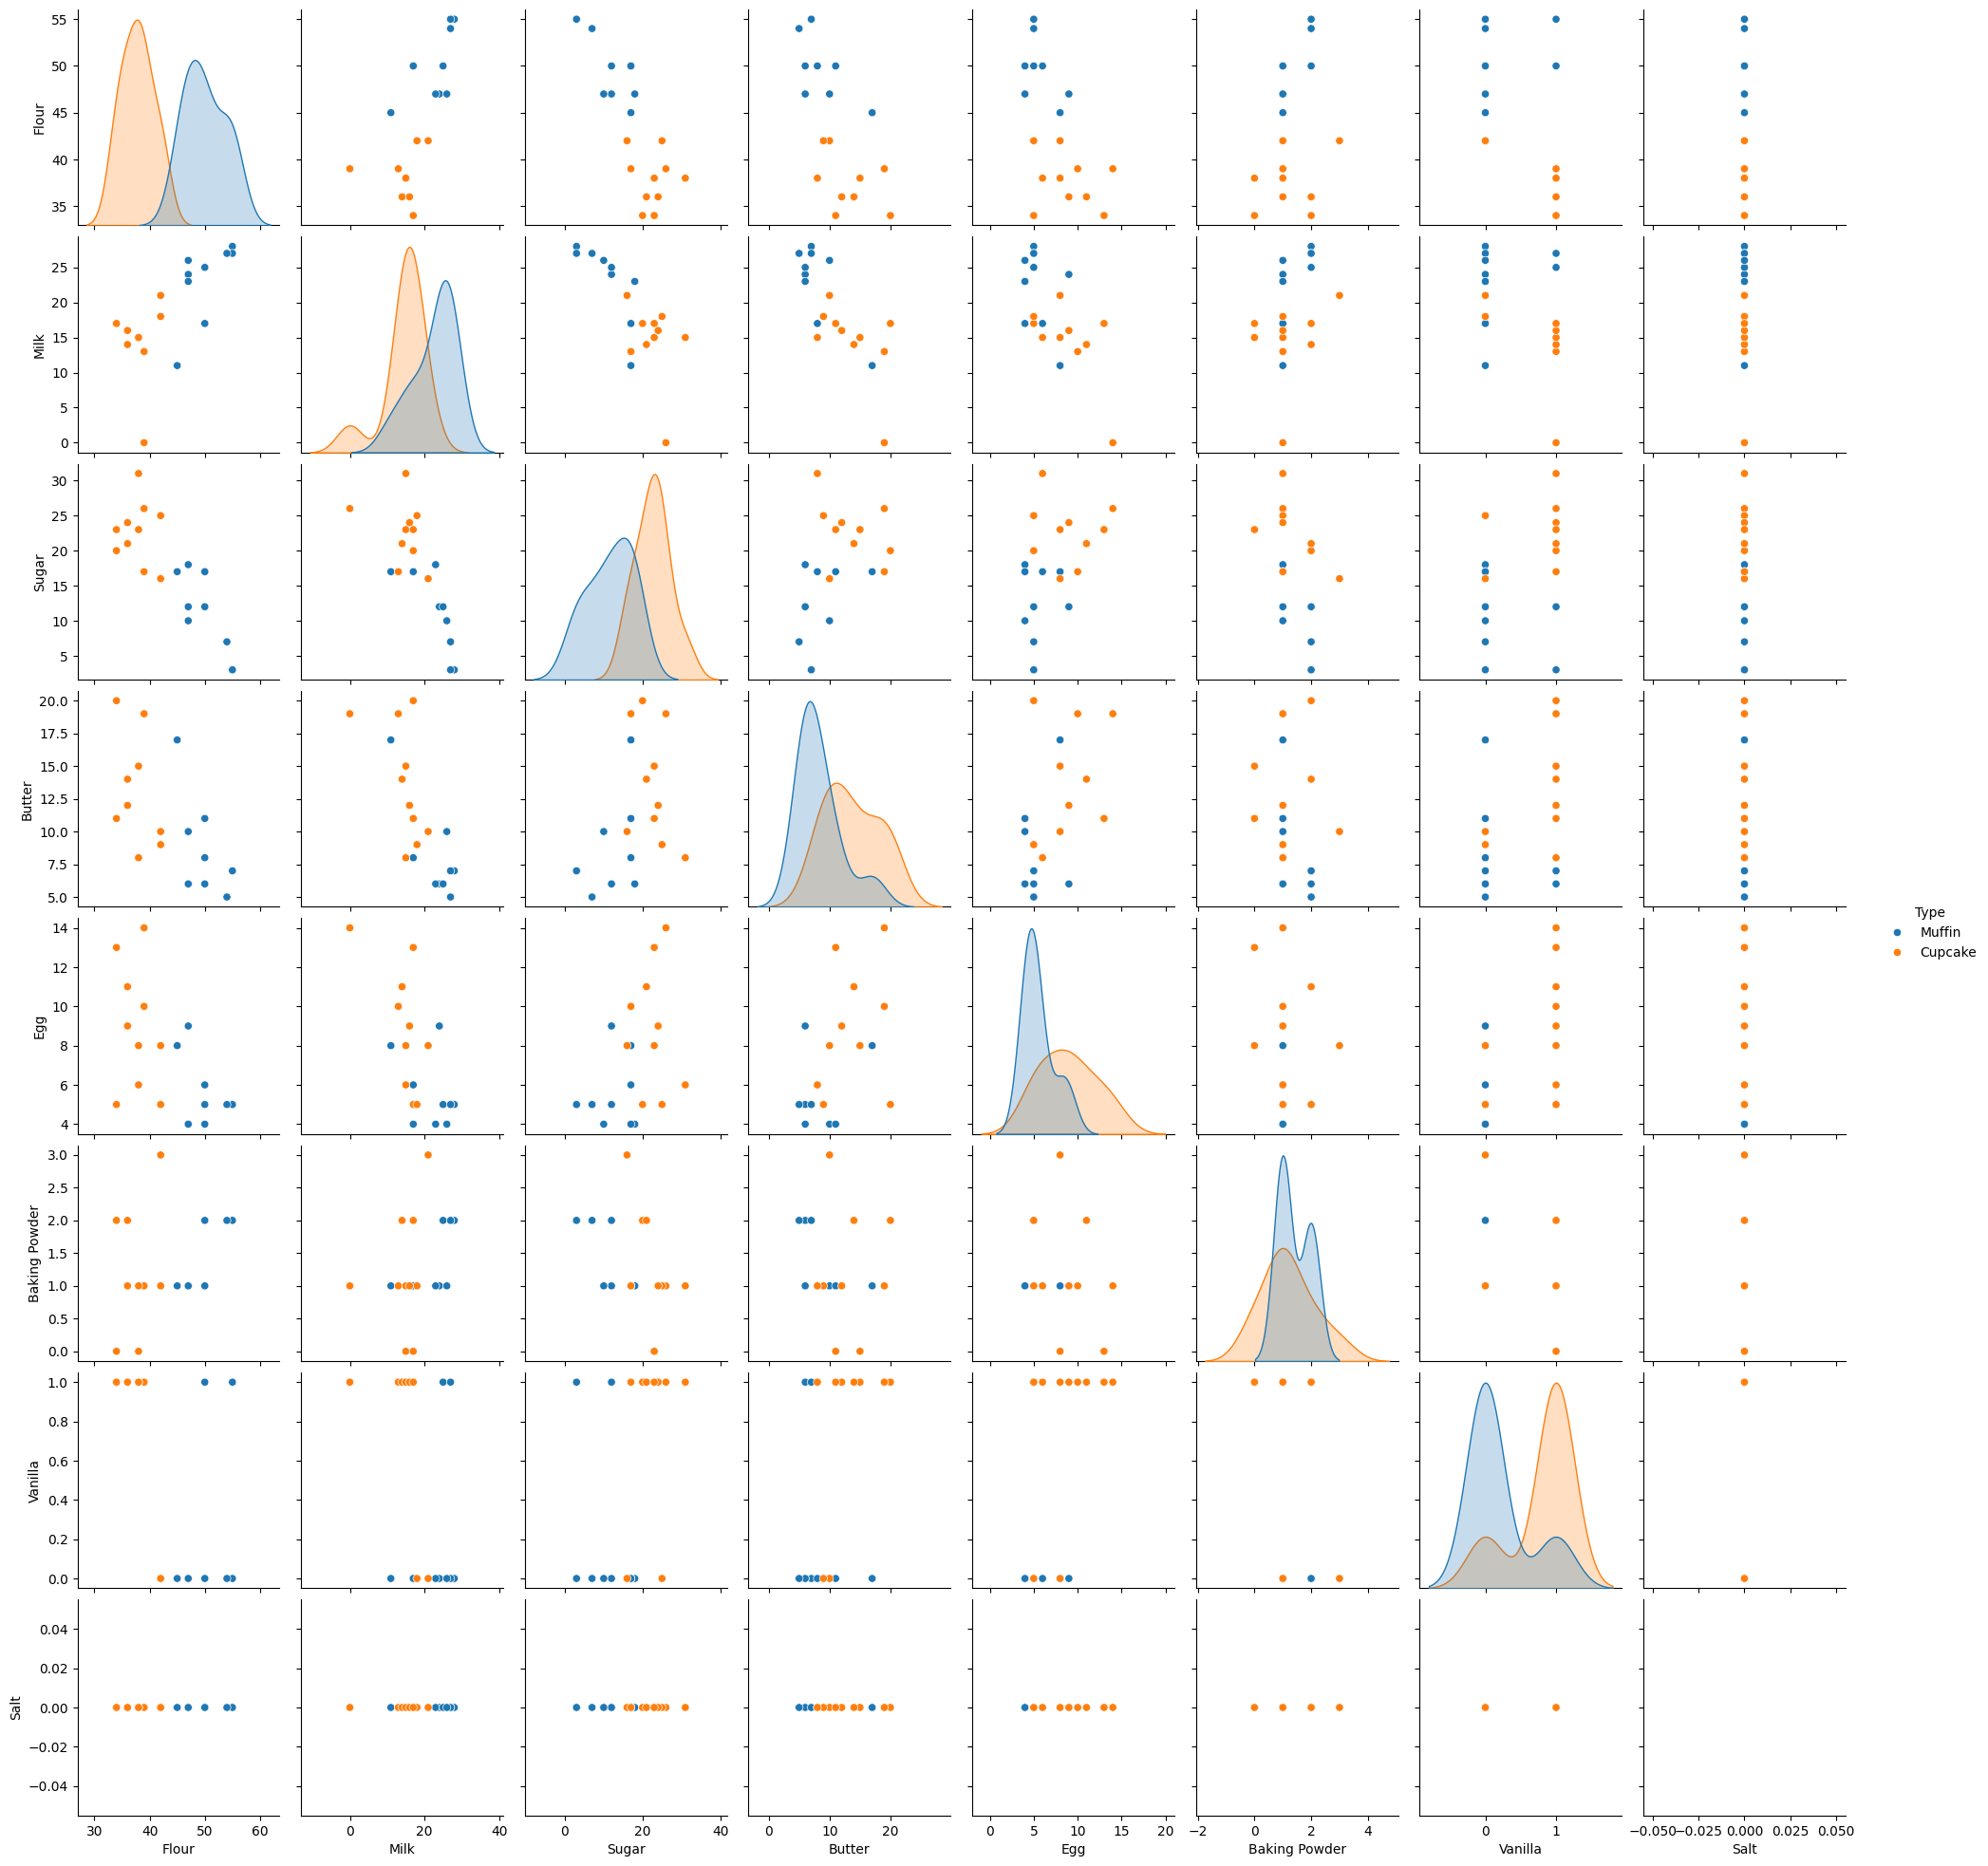

In [28]:
import seaborn as sns
# just like last week, we can make a pair plot to investigate the data. However, it is hard to make sense of it for 8 features
sns.pairplot(data, hue = 'Type')

In [29]:
# Train SVM with a non-linear kernel
clf = SVC(C = 2, kernel = 'rbf', gamma = 0.01)
clf.fit(X, y)
print(
    f'Prediction: clf((0.8, 7.2, 0.6, 2.3, 0.01, 0.51, 9.1, 4.6)) = '
    f'{clf.predict([[0.8, 7.2, 0.6, 2.3, 0.01, 0.51, 9.1, 4.6]])[0]}'
)

Prediction: clf((0.8, 7.2, 0.6, 2.3, 0.01, 0.51, 9.1, 4.6)) = Cupcake


In [30]:
# Principal Component Analysis (dimension reduction)
pca = PCA(n_components = 2)
X_PC = pca.fit_transform(X)
print(
    f'X_PC.shape = {X_PC.shape}.\nX_PC contains the amounts of the 2 '
    f'"principal ingredient coordinates" for each of the 20 sweet treats.'
)

X_PC.shape = (20, 2).
X_PC contains the amounts of the 2 "principal ingredient coordinates" for each of the 20 sweet treats.


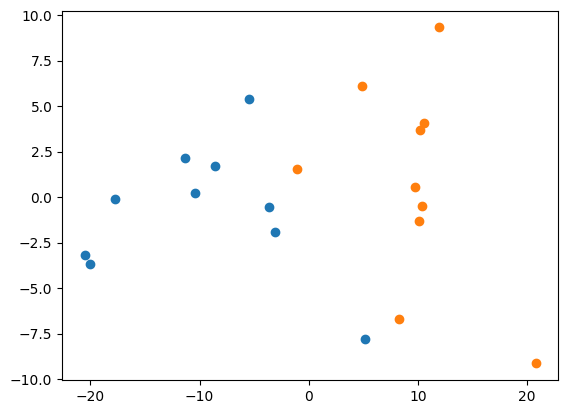

In [31]:
plt.scatter(X_PC[data.Type == 'Muffin', 0], X_PC[data.Type == 'Muffin', 1])
plt.scatter(X_PC[data.Type == 'Cupcake', 0], X_PC[data.Type == 'Cupcake', 1])

#### Train the classifier and plot the decision surface (in the transformed 2D space)
1. Create a meshgrid of evenly space points in the region occupied by the (transformed) data.  
2. For each point in the grid, transform it back to the 8D space (using `inverse_transform`) and classify it using the SVM (using `decision_function`).  
3. Plot a coloured contour plot to show the classification of each grid point.

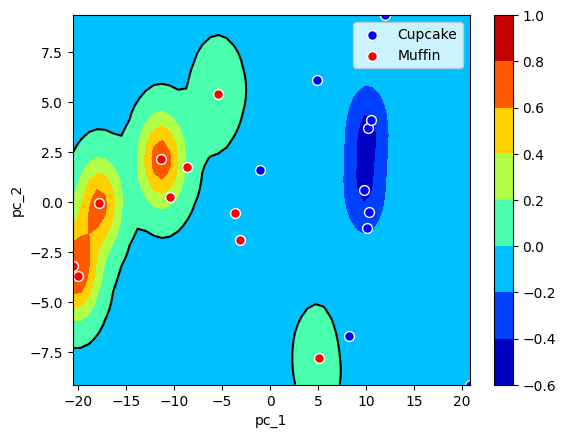

In [37]:
clf = SVC(C = 2, kernel = 'rbf', gamma = 0.2)
clf.fit(X, y)

# X_1, X_2 are elements of PC-space (2D):
m = 50
X_1, X_2 = np.meshgrid(np.linspace(X_PC[:, 0].min(), X_PC[:, 0].max(), m),
                       np.linspace(X_PC[:, 1].min(), X_PC[:, 1].max(), m))

# Inverse transform from 2D grid space to 8D recipe space, 
# so the classifier can predict the location w.r.t. to the hyperplane (~label)
X_grid_8D = pca.inverse_transform(
    np.c_[X_1.ravel(), X_2.ravel()] # transforms mesh to column vectors
) 

# clf.decision_function determines the distance (i.e. location) with respect to the decicion boundary (hyperplane)
y_hat_1D = clf.decision_function(X_grid_8D)

# Reshape y_hat_1D to PC space
y_hat_2D = y_hat_1D.reshape(X_1.shape)

# Plot
plt.figure(dpi = 100)
plt.contour(X_1, X_2, y_hat_2D, colors = ['b', 'k', 'r'], levels = [-1, 0, 1])  # lines
plt.contourf(X_1, X_2, y_hat_2D, cmap = plt.cm.jet) # color fill
plt.colorbar()
plt.scatter(X_PC[y == 'Cupcake', 0], X_PC[y == 'Cupcake', 1], s = 50, c = 'b', label = 'Cupcake', edgecolor = 'w')
plt.scatter(X_PC[y == 'Muffin', 0], X_PC[y == 'Muffin', 1], s = 50, c = 'r', label = 'Muffin', edgecolor = 'w')

plt.xlabel('pc_1')
plt.ylabel('pc_2')
plt.legend()

### Performance metrics
$\textrm{accuracy}= \frac{TP+TN}{TP+TN+FP+FN}$  

$\textrm{balanced accuracy} = \frac{\frac{TP}{P}+\frac{TN}{N}}{2}$  

Precision looks to see how much false positives got thrown in the prediction mix: $\textrm{precision} = \frac{TP}{TP+FP}$  

Recall looks at the number of false negatives that were thrown into the prediction mix: $\textrm{recall} = \frac{TP}{TP+FN}$  

$F_1$ is a popular metric to use for classification models as it provides accurate results for both balanced and imbalanced datasets, and takes into account both the precision and recall ability of the model:
$$F_1 = 2\frac{\textrm{precision}\cdot\textrm{recall}}{\textrm{precision}+\textrm{recall}}$$

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 4)

clf = SVC(C = 2, kernel = 'rbf', gamma = 0.001)
clf.fit(X_train, y_train)

y_prediction = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
balanced_accuracy = balanced_accuracy_score(y_test, y_prediction)

print('Total number of test data points for each class:')
print(y_test.value_counts().to_csv(header = None, sep = '\t'))
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_prediction)}\n') # rows: actual, columns: predicted  [[tn, fp], [fn, tp]]
# print(f'True test labels:\n{y_test.tolist()}')
# print(f'Predicted test labels:\n{y_prediction.tolist()}\n')
tbl = classification_report(y_test, y_prediction, target_names = ['Cupcake', 'Muffin'])
cut_index = tbl.index('accuracy')
cutted_tbl = tbl[:cut_index]
print(cutted_tbl[:len(cutted_tbl) - 6])
print(f'    accuracy: {accuracy:.2f}')
print(f'    balanced accuracy: {balanced_accuracy:.2f}')

Total number of test data points for each class:
Cupcake	3
Muffin	3

Confusion matrix:
[[3 0]
 [1 2]]

              precision    recall  f1-score   support

     Cupcake       0.75      1.00      0.86         3
      Muffin       1.00      0.67      0.80         3
    accuracy: 0.83
    balanced accuracy: 0.83


In [34]:
# last question: can a linear svm be better than rbf?
lin_svm = SVC(kernel = 'linear')
columns = [0, 2]
lin_svm.fit(X_train[:, columns], y_train)
y_pred_lin = lin_svm.predict(X_test[:, columns])
accuracy_score(y_test, y_pred_lin)

1.0